### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the excel file into a pandas dataframe

In [2]:
birdstrike = pd.read_excel("Bird Strikes data.xlsx")
birdstrike.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50.0,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,2003-06-23,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50.0,0,No


### Checking for null values

In [3]:
birdstrike.isnull().sum()

Record ID                                      0
Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                                0
Wildlife: Species   

### Taking Care of null values

In [4]:
birdstrike["Effect: Indicated Damage"].replace(to_replace=['No damage', 'Caused damage'], value=[0, 1],inplace=True)
birdstrike["Pilot warned of birds or wildlife?"].replace(to_replace=['N', 'Y'], value=[0, 1],inplace=True)
birdstrike["Effect: Impact to flight"] = birdstrike["Effect: Impact to flight"].fillna("No Impact")
birdstrike["Conditions: Precipitation"] = birdstrike["Conditions: Precipitation"].fillna("No Precipitation")

### Drop Remarks Column and null value rows for better analysis

In [5]:
birdstrike = birdstrike.drop("Remarks",axis=1)
birdstrike = birdstrike.dropna()
birdstrike.describe()

,Record ID,Wildlife: Number Struck Actual,FlightDate,Effect: Indicated Damage,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured
count,24747.000000,24747.000000,24747,24747.000000,24747.000000,2.474700e+04,24747.000000,24747.000000
mean,254485.775165,2.689255,2007-01-23 03:03:49.118680832,0.096335,0.430557,5.485157e+03,801.538449,0.000849
min,200011.000000,1.000000,2000-01-02 00:00:00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,225827.000000,1.000000,2004-06-21 00:00:00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
50%,248552.000000,1.000000,2007-07-27 00:00:00,0.000000,0.000000,0.000000e+00,50.000000,0.000000
75%,268974.500000,1.000000,2009-10-31 00:00:00,0.000000,1.000000,0.000000e+00,700.000000,0.000000
max,321909.000000,942.000000,2011-12-31 00:00:00,1.000000,1.000000,1.239775e+07,18000.000000,6.000000
std,35581.910360,12.506021,NaN,0.295056,0.495164,1.231439e+05,1736.743268,0.047986


In [6]:
birdstrike.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24747 entries, 0 to 25557
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Record ID                                24747 non-null  int64         
 1   Aircraft: Type                           24747 non-null  object        
 2   Airport: Name                            24747 non-null  object        
 3   Altitude bin                             24747 non-null  object        
 4   Aircraft: Make/Model                     24747 non-null  object        
 5   Wildlife: Number struck                  24747 non-null  object        
 6   Wildlife: Number Struck Actual           24747 non-null  int64         
 7   Effect: Impact to flight                 24747 non-null  object        
 8   FlightDate                               24747 non-null  datetime64[ns]
 9   Effect: Indicated Damage                 247

### Add a Year column for segregation on the basis of year

In [7]:
birdstrike["Year"] = birdstrike["FlightDate"].dt.year
birdstrike.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,Year
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,1,...,False,Medium,No Cloud,Unknown bird - medium,0.0,30736,1500.0,0,Yes,2000
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,No Impact,2001-07-25,1,...,False,Small,Some Cloud,Rock pigeon,1.0,0,0.0,0,No,2001
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,No Impact,2001-09-14,0,...,False,Small,No Cloud,European starling,0.0,0,50.0,0,No,2001
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,0,...,False,Small,Some Cloud,European starling,1.0,0,50.0,0,Yes,2002
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,No Impact,2003-06-23,0,...,False,Small,No Cloud,European starling,0.0,0,50.0,0,No,2003


### Group the data Year wise

In [8]:
yearwise_birdstrike = birdstrike.groupby("Year")["Record ID"].count().reset_index()
yearwise_birdstrike.rename(columns = {"Record ID":"No. of Birdstrikes"},inplace=True)
yearwise_birdstrike.head()

,Year,No. of Birdstrikes
0,2000,1321
1,2001,1175
2,2002,1619
3,2003,1541
4,2004,1671


### Visuals depicting the number of Bird Strikes Yearly

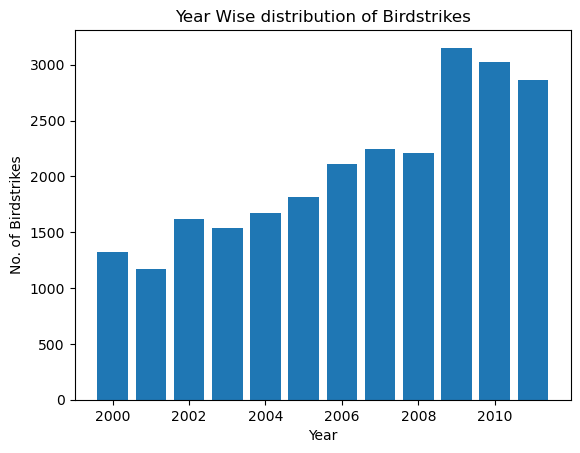

In [9]:
plt.bar(yearwise_birdstrike["Year"],yearwise_birdstrike["No. of Birdstrikes"])
plt.xlabel("Year")
plt.ylabel("No. of Birdstrikes")
plt.title("Year Wise distribution of Birdstrikes")
plt.show()

### Statewise segregation of the data

In [10]:
statewise_birdstrike = birdstrike.groupby("Origin State")["Record ID"].count().reset_index()
statewise_birdstrike.rename(columns = {"Record ID":"No. of Birdstrikes"},inplace=True)
statewise_birdstrike.head()

,Origin State,No. of Birdstrikes
0,Alabama,295
1,Alaska,184
2,Alberta,3
3,Arizona,356
4,Arkansas,117


### Bar Chart depicting number of Bird Strikes State wise

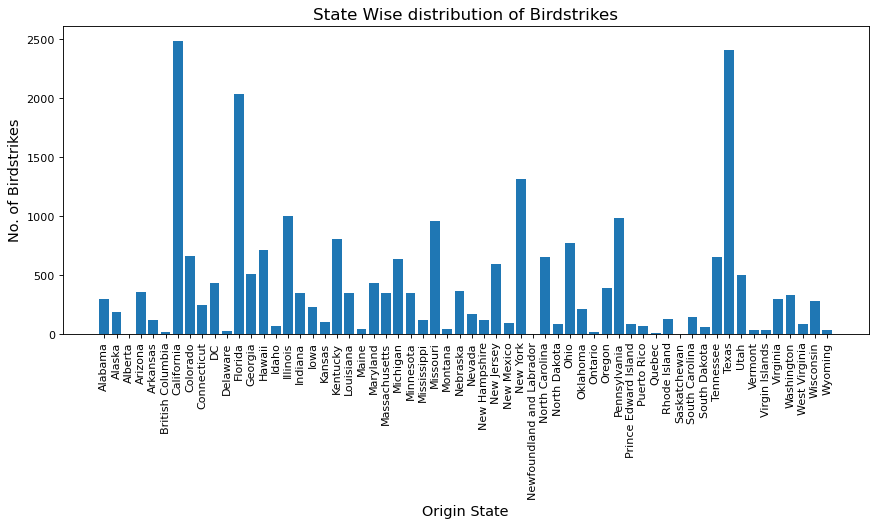

In [11]:
plt.figure(figsize=(13,5),dpi=80)
plt.bar(statewise_birdstrike["Origin State"],statewise_birdstrike["No. of Birdstrikes"])
plt.xlabel("Origin State",fontsize=13)
plt.xticks(rotation=90)
plt.ylabel("No. of Birdstrikes",fontsize=13)
plt.title("State Wise distribution of Birdstrikes",fontsize=15)
plt.show()

### Top 10 US Airlines in terms of having encountered Bird Strikes

In [12]:
airlinewise_birdstrike = birdstrike.groupby("Aircraft: Airline/Operator")["Record ID"].count().reset_index()
airlinewise_birdstrike.rename(columns = {"Record ID":"No. of Birdstrikes"},inplace=True)
airlinewise_birdstrike = airlinewise_birdstrike.sort_values("No. of Birdstrikes",ascending=False)
airlinewise_birdstrike.head(10)

,Aircraft: Airline/Operator,No. of Birdstrikes
247,SOUTHWEST AIRLINES,4628
69,BUSINESS,3035
45,AMERICAN AIRLINES,1852
112,DELTA AIR LINES,1312
46,AMERICAN EAGLE AIRLINES,920
243,SKYWEST AIRLINES,891
271,US AIRWAYS*,780
165,JETBLUE AIRWAYS,677
269,UPS AIRLINES,546
270,US AIRWAYS,515


### Airports with the most incidents of Bird Strikes - Top 50

In [13]:
airportwise_birdstrike = birdstrike.groupby("Airport: Name")["Record ID"].count().reset_index()
airportwise_birdstrike.rename(columns = {"Record ID":"No. of Birdstrikes"},inplace=True)
airportwise_birdstrike = airportwise_birdstrike.sort_values("No. of Birdstrikes",ascending=False)
airportwise_birdstrike.head(50)

,Airport: Name,No. of Birdstrikes
188,DALLAS/FORT WORTH INTL ARPT,802
776,SACRAMENTO INTL,676
783,SALT LAKE CITY INTL,479
211,DENVER INTL AIRPORT,476
439,KANSAS CITY INTL,452
698,PHILADELPHIA INTL,442
666,ORLANDO INTL,408
48,BALTIMORE WASH INTL,401
512,LOUISVILLE INTL ARPT,394
424,JOHN F KENNEDY INTL,389


### Yearly Cost incurred due to Bird Strikes and Visualising it

In [14]:
yearwise_cost = birdstrike.groupby("Year")["Cost: Total $"].sum().reset_index()
yearwise_cost.head()

,Year,Cost: Total $
0,2000,5041825
1,2001,21860525
2,2002,8919504
3,2003,13174490
4,2004,8086573


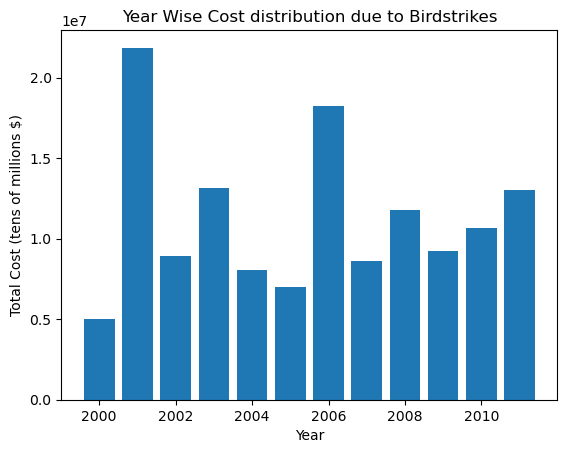

In [15]:
plt.bar(yearwise_cost["Year"],yearwise_cost["Cost: Total $"])
plt.xlabel("Year")
plt.ylabel("Total Cost (tens of millions $)")
plt.title("Year Wise Cost distribution due to Birdstrikes")
plt.show()

### Phase of the flight during most of the Bird Strikes

In [16]:
flightphase_birdstrike = birdstrike.groupby("When: Phase of flight")["Record ID"].count().reset_index()
flightphase_birdstrike.rename(columns = {"Record ID":"No. of Birdstrikes"},inplace=True)
flightphase_birdstrike.sort_values("No. of Birdstrikes",ascending=False)

,When: Phase of flight,No. of Birdstrikes
0,Approach,10151
3,Landing Roll,4946
5,Take-off run,4560
1,Climb,4247
2,Descent,763
6,Taxi,71
4,Parked,9


### Binary Altitude during Bird Strikes

In [17]:
altitudebin_birdstrike = birdstrike.groupby("Altitude bin")["Record ID"].count().reset_index()
altitudebin_birdstrike.rename(columns = {"Record ID":"No. of Birdstrikes"},inplace=True)
altitudebin_birdstrike.head()

,Altitude bin,No. of Birdstrikes
0,< 1000 ft,19977
1,> 1000 ft,4770


### Average altitude of aeroplanes in different phases at the time of the strike

In [18]:
phase_altitude = birdstrike.groupby("When: Phase of flight")["Feet above ground"].mean().reset_index()
phase_altitude.head()

,When: Phase of flight,Feet above ground
0,Approach,1004.757856
1,Climb,1204.549564
2,Descent,5924.840105
3,Landing Roll,0.000000
4,Parked,0.000000


### Whether the Bird Strike Caused Damage and Visualising it

In [19]:
indicated_damage = birdstrike.groupby("Effect: Indicated Damage")["Record ID"].count().reset_index()
indicated_damage.rename(columns = {"Record ID":"No. of Birdstrikes"},inplace=True)
indicated_damage.head()

,Effect: Indicated Damage,No. of Birdstrikes
0,0,22363
1,1,2384


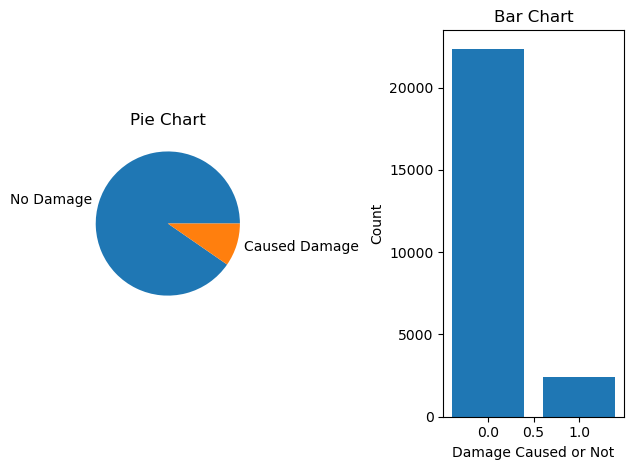

In [20]:
plt.subplot(1,2,1)
plt.pie(indicated_damage["No. of Birdstrikes"],labels=["No Damage","Caused Damage"])
plt.title("Pie Chart")
plt.subplot(1,2,2)
plt.bar(indicated_damage["Effect: Indicated Damage"],indicated_damage["No. of Birdstrikes"])
plt.xlabel("Damage Caused or Not")
plt.ylabel("Count")
plt.title("Bar Chart")
plt.tight_layout()
plt.show()

### Bird Strike Impact on flight and visualising it

In [21]:
impact_birdstrike = birdstrike.groupby("Effect: Impact to flight")["Record ID"].count().reset_index()
impact_birdstrike.rename(columns = {"Record ID":"No. of Birdstrikes"},inplace=True)
impact_birdstrike.head()

,Effect: Impact to flight,No. of Birdstrikes
0,Aborted Take-off,468
1,Engine Shut Down,85
2,No Impact,22752
3,Other,376
4,Precautionary Landing,1066


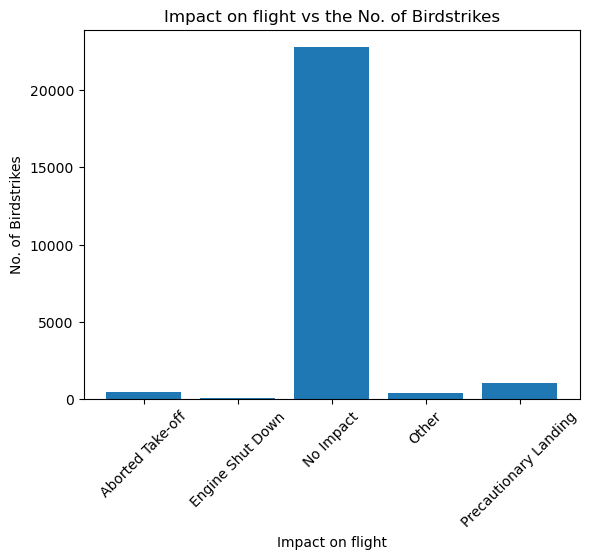

In [22]:
plt.bar(impact_birdstrike["Effect: Impact to flight"],impact_birdstrike["No. of Birdstrikes"])
plt.xticks(rotation=45)
plt.xlabel("Impact on flight")
plt.ylabel("No. of Birdstrikes")
plt.title("Impact on flight vs the No. of Birdstrikes")
plt.show()

### Effect of Strike at different altitudes

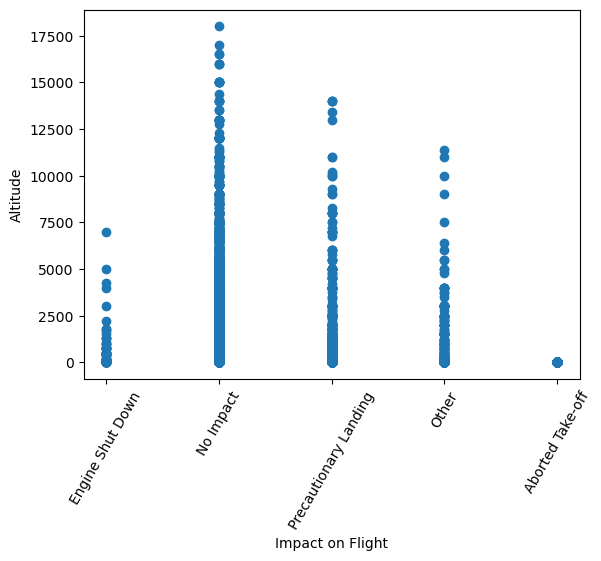

In [23]:
plt.scatter(birdstrike["Effect: Impact to flight"],birdstrike["Feet above ground"])
plt.xlabel("Impact on Flight")
plt.ylabel("Altitude")
plt.xticks(rotation=60)
plt.show()

#### We can notice from the above scatterplot that there are no engine failures and aborted flights at high altitude whereas planes on low altitude suffer all kinds of impacts

### Were pilots Informed and its effect on Impact ?

In [24]:
birdstrike["Pilot warned of birds or wildlife?"].value_counts()

Pilot warned of birds or wildlife?
0.0    14092
1.0    10655
Name: count, dtype: int64

In [25]:
pilots_warned = birdstrike.groupby("Effect: Impact to flight")["Pilot warned of birds or wildlife?"].sum().reset_index()
pilots_warned.head()

,Effect: Impact to flight,Pilot warned of birds or wildlife?
0,Aborted Take-off,221.0
1,Engine Shut Down,35.0
2,No Impact,9801.0
3,Other,140.0
4,Precautionary Landing,458.0


In [26]:
pilots_not_warned = birdstrike.groupby("Effect: Impact to flight")["Pilot warned of birds or wildlife?"].count().reset_index()
pilots_not_warned.head()

,Effect: Impact to flight,Pilot warned of birds or wildlife?
0,Aborted Take-off,468
1,Engine Shut Down,85
2,No Impact,22752
3,Other,376
4,Precautionary Landing,1066


In [27]:
pilot_warning = pd.merge(pilots_warned,pilots_not_warned,on="Effect: Impact to flight")
pilot_warning["Not Warned"]=pilot_warning["Pilot warned of birds or wildlife?_y"]-pilot_warning["Pilot warned of birds or wildlife?_x"]
pilot_warning.rename(columns={"Pilot warned of birds or wildlife?_x":"Warned"},inplace=True)
pilot_warning.drop("Pilot warned of birds or wildlife?_y",axis=1,inplace=True)
pilot_warning

,Effect: Impact to flight,Warned,Not Warned
0,Aborted Take-off,221.0,247.0
1,Engine Shut Down,35.0,50.0
2,No Impact,9801.0,12951.0
3,Other,140.0,236.0
4,Precautionary Landing,458.0,608.0


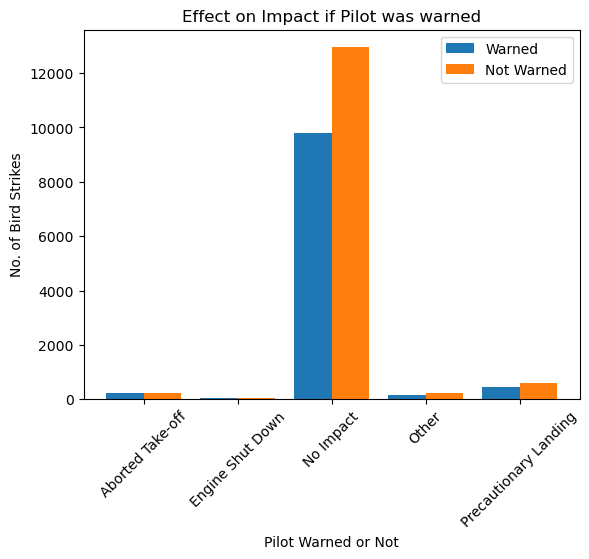

In [28]:
width=0.40
x=np.arange(5)
plt.bar(x-0.2,pilot_warning["Warned"],width,label="Warned")
plt.bar(x+0.2,pilot_warning["Not Warned"],width,label="Not Warned")
plt.legend()
plt.title("Effect on Impact if Pilot was warned")
plt.ylabel("No. of Bird Strikes")
plt.xlabel("Pilot Warned or Not")
plt.xticks(x,labels=pilot_warning["Effect: Impact to flight"],rotation = 45)
plt.show()

#### We can notice that there are less incidents of an Impact if the pilot was Warned.